In [4]:
# Making all the libraries for this project

import sounddevice as sd
from scipy.io.wavfile import write, read
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import math
from scipy.signal import chirp
import soundfile as sf
from scipy.signal import butter, lfilter

In [5]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 10

Sine wave saved as Q1_sine_wave.wav


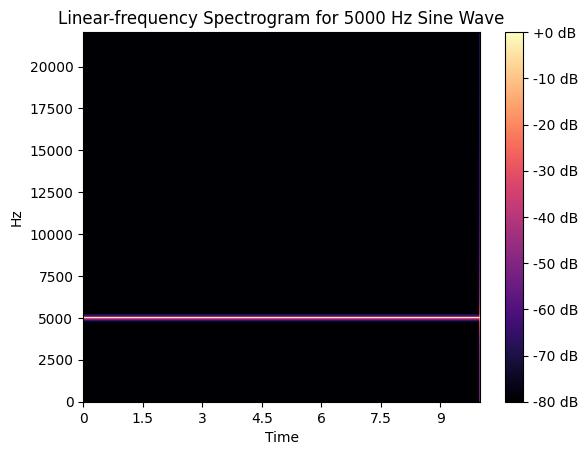

In [6]:
# Define a Sine Wave

# define time
t = np.arange(0, 10, 1/sr)

# define frequency
f = 5000 # Hz

# define amplitude
a = 1

# Creating the sine function
x = a*np.sin(2*math.pi*f*t)

x_pcm = (x * 32767).astype(np.int16)    # This was a line of code I needed to do to get the sine wave to play properly

# Save the sine wave as a WAV file
output_filename = 'Q1_sine_wave.wav'
write(output_filename, sr, x_pcm)

print(f"Sine wave saved as {output_filename}")

# Compute the linear-frequency spectrogram using the generated sine wave (x) and sampling rate (sr)
spectrogram = np.abs(librosa.stft(x))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=spectrogram.shape[0])

# Display the spectrogram with linear frequency axis
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title(f'Linear-frequency Spectrogram for {f} Hz Sine Wave')
plt.show()

# Play the sound

# Load the recording from the WAV file
filename = 'Q1_sine_wave.wav'
sampling_rate, recording = read(filename)

# Play the recording
sd.play(recording, samplerate=sampling_rate)
sd.wait()  # Wait for playback to finish



Chirp saved as Q2_chirp_wave.wav


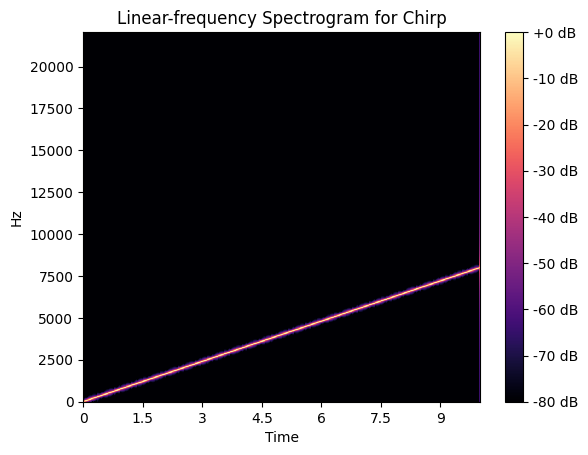

In [7]:
# Define a Chirp Wave

# define time
t = np.arange(0, 10, 1/sr)

# define frequency
f = 5000 # Hz

# define amplitude
a = 1

# Frequency parameters
f_start = 0  # Start frequency of the chirp (in Hz)
f_end = 8000  # End frequency of the chirp (in Hz)

# Create the chirp signal
y = chirp(t, f0=f_start, f1=f_end, t1=duration, method='linear')

y_pcm = (y * 32767).astype(np.int16)    # This was a line of code I needed to do to get the sine wave to play properly

# Save the sine wave as a WAV file
output_filename = 'Q2_chirp_wave.wav'
write(output_filename, sr, y_pcm)

print(f"Chirp saved as {output_filename}")

# Compute the linear-frequency spectrogram using the generated sine wave (x) and sampling rate (sr)
spectrogram = np.abs(librosa.stft(y))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=spectrogram.shape[0])

# Display the spectrogram with linear frequency axis
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title(f'Linear-frequency Spectrogram for Chirp')
plt.show()

# Play the sound

# Load the recording from the WAV file
filename = 'Q2_chirp_wave.wav'
sampling_rate, recording = read(filename)

# Play the recording
sd.play(recording, samplerate=sampling_rate)
sd.wait()  # Wait for playback to finish



CETK saved as Q3_CETK.wav


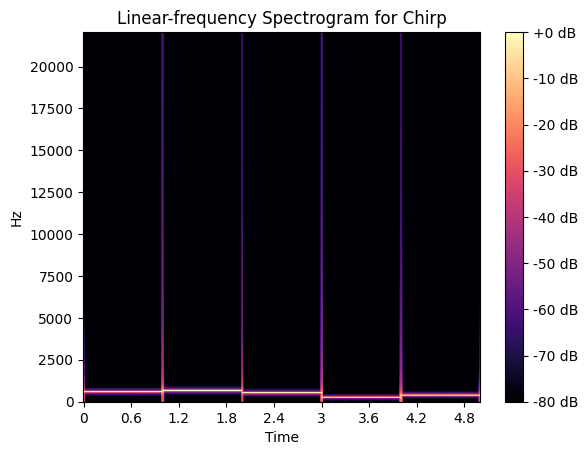

In [8]:
# Duration of each tone
duration = 1  # in seconds

# Define the frequencies for the five tones
frequencies = [587.33, 659.26, 523.25, 261.63, 392]  # Replace with the actual frequencies from the video

# Create the sine wave for each tone
tones = []
for freq in frequencies:
    t = np.arange(0, duration, 1/sr)
    tone = np.sin(2 * np.pi * freq * t)
    tones.append(tone)

# Concatenate the five tones to create the sequence
z = np.concatenate(tones)

z_pcm = (z * 32767).astype(np.int16)    # This was a line of code I needed to do to get the sine wave to play properly

# Save the sine wave as a WAV file
output_filename = 'Q3_CETK.wav'
write(output_filename, sr, z_pcm)

print(f"CETK saved as {output_filename}")

# Compute the linear-frequency spectrogram using the generated sine wave (x) and sampling rate (sr)
spectrogram = np.abs(librosa.stft(z))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=spectrogram.shape[0])

# Display the spectrogram with linear frequency axis
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title(f'Linear-frequency Spectrogram for Chirp')
plt.show()

# Play the sound

# Load the recording from the WAV file
filename = 'Q3_CETK.wav'
sampling_rate, recording = read(filename)

# Play the recording
sd.play(recording, samplerate=sampling_rate)
sd.wait()  # Wait for playback to finish


In [9]:
# Look at the discrete number array we got from the audio
fox, sr1 = librosa.load('brownfox.wav')

print(sr1)




22050


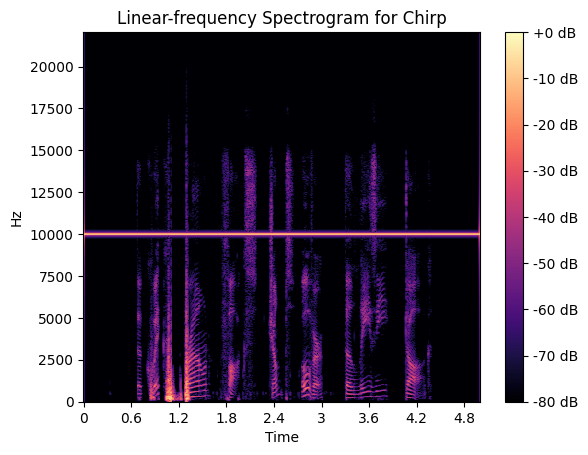

In [10]:
t = np.arange(0, 10, 1/sr1)

# define frequency
f = 5000 # Hz

# define amplitude
a = 1

# Creating the sine function
g = a*np.sin(2*math.pi*f*t)
g_pcm = (g * 32767).astype(np.int16)


combined_signal = g + fox

combined_signal_pcm = (combined_signal * 32767).astype(np.int16)

# Save the sine wave as a WAV file
output_filename = 'Combined_Signal.wav'
write(output_filename, sr1, combined_signal_pcm)

# Compute the linear-frequency spectrogram using the generated sine wave (x) and sampling rate (sr)
spectrogram = np.abs(librosa.stft(combined_signal))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=spectrogram.shape[0])

# Display the spectrogram with linear frequency axis
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title(f'Linear-frequency Spectrogram for Chirp')
plt.show()

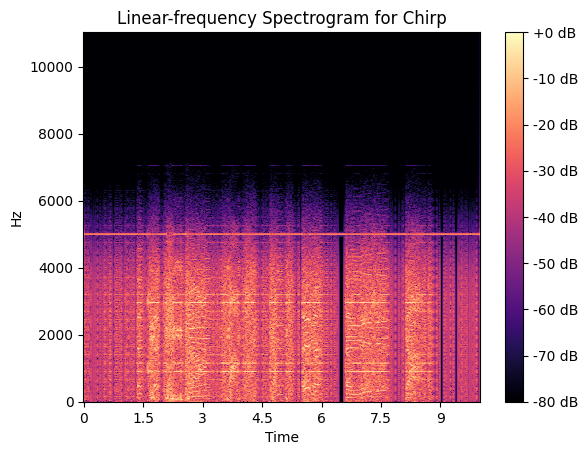

In [14]:
combined_signal, sr = sf.read(output_filename)

# Design a lowpass Butterworth filter
cut_off_frequency = 4000  # Hz
order = 4  # Filter order

nyquist = 0.5 * sr
cut_off = cut_off_frequency / nyquist
b, a = butter(order, cut_off, btype='low')

# Apply the filter to the combined signal
filtered_signal = lfilter(b, a, combined_signal)

filtered_signal_pcm = (filtered_signal * 32767).astype(np.int16)

output_filename = 'Filtered_signal.wav'
write(output_filename, sr1, filtered_signal_pcm)


# Compute the linear-frequency spectrogram using the generated sine wave (x) and sampling rate (sr)
spectrogram = np.abs(librosa.stft(filtered_signal))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=spectrogram.shape[0])

# Display the spectrogram with linear frequency axis
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title(f'Linear-frequency Spectrogram for Chirp')
plt.show()

In [12]:
# Load the recording from the WAV file
filename = 'brownfox.wav'
sampling_rate, recording = read(filename)

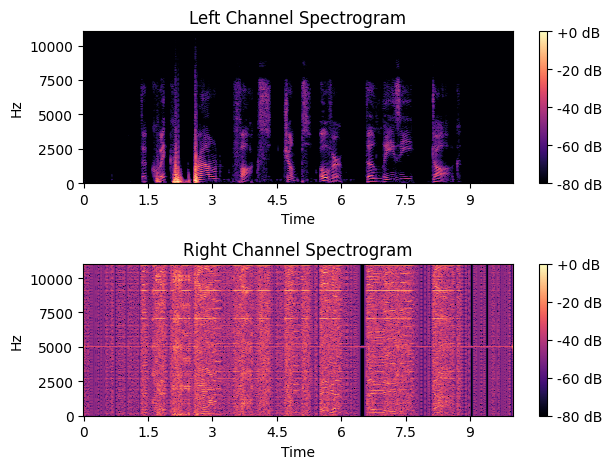

In [16]:
stereo_audio_data = np.column_stack((fox, combined_signal_pcm))
write("stereo.wav",sr1,stereo_audio_data)

stereo_audio_file = "stereo.wav"
y, sr = librosa.load(stereo_audio_file, sr=None, mono=False)

# Compute the left and right spectrograms
left_spectrogram = np.abs(librosa.stft(y[0]))
right_spectrogram = np.abs(librosa.stft(y[1]))

# Convert bin frequencies to Hertz
freqs = librosa.fft_frequencies(sr=sr, n_fft=left_spectrogram.shape[0])

# Plot the left spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(left_spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Left Channel Spectrogram')

# Plot the right spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(right_spectrogram, ref=np.max), y_axis='linear', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Right Channel Spectrogram')

plt.tight_layout()
plt.show()

